<a href="https://colab.research.google.com/github/JLuceroVasquez/visualizacion-de-datos-con-bibliotecas-de-python/blob/main/visualizacion_de_datos_con_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualización de datos con Python: Matplotlib, Seaborn y Plotly
En el curso se aprendió a crear visualizaciones con tres bibliotecas de Python: Matplotlib, Seaborn y Plotly.

Se asumió el rol de un analista de datos para una consultoría que presta servicios de migración para peruanos que desean viajar a Canadá. Se analizó un conjunto de datos con información histórica sobre la inmigración en Canadá desde 1980 hasta 2013.

In [1]:
#Se importa la biblioteca Pandas
import pandas as pd

##Conociendo la biblioteca Maplotlib

###Conociendo los datos
En esta primera sesión se cargó el dataframe con los datos de inmigración de 185 países a Canadá de 1980 a 2013. Se filtraron los datos del dataframe a fin de crear uno nuevo que contenga solo los datos de inmigración de Perú.

In [2]:
#Se asigna la dirección URL a una variable global.
url = 'https://github.com/JLuceroVasquez/visualizacion-de-datos-con-bibliotecas-de-python/raw/refs/heads/main/inmigrantes_canada.csv'

#Se cargaron los datos del archivo CSV a un dataframe.
df_inmigraciontotal = pd.read_csv(url)
df_inmigraciontotal.head()

,Pais,Continente,Region,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afganistán,Asia,Sur de Asia,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europa,Sur de Europa,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
2,Argelia,África,Norte de África,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,Samoa Americana,Oceanía,Polinesia,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europa,Sur de Europa,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [3]:
#Se conoce las dimensiones del dataframe.
df_inmigraciontotal.shape

(195, 38)

In [4]:
#Se establece como índice a la columna Pais, y modifica el dataframe original con el parámetro inplace.
df_inmigraciontotal.set_index(keys=['Pais'], inplace=True)

In [5]:
#Se crea una lista con los años de los paises como datos tipo texto.
'''
Se crea una lista (list) a partir de datos numéricos enteros entre 1980 y 2013
(el último número de range es exclusivo) que se convierten en texto aplicando
la función str con map a cada uno de los valores.
'''
anos = list(map(str, range(1980,2014)))

#Se crea una serie de Pandas donde los índices son los años y los valores de la serie son los datos de inmigración desde Perú.
serie_inmigracionperu = df_inmigraciontotal.loc['Perú', anos]
serie_inmigracionperu.head()

,Perú
1980,317
1981,456
1982,401
1983,241
1984,306


In [6]:
#Se crea un diccionario con la serie inmigracion Peru para su conversión futura a Dataframe.
'''
"serie_inmigracionperu.index" es un objeto tipo serie_inmigracionperu.index.
"serie_inmigracionperu.values" es un objeto tipo numpy.ndarray.
Aunque en este caso "list()" y "tolist()" parecen funcionar de la misma manera,
puede haber situaciones en las que una opción sea más adecuada que la otra.
'''
dict_inmigracionperu = {'Anos':list(serie_inmigracionperu.index),
                        'Peru':list(serie_inmigracionperu.values)}

df_inmigracionperu = pd.DataFrame(dict_inmigracionperu)
df_inmigracionperu.head()

,Anos,Peru
0,1980,317
1,1981,456
2,1982,401
3,1983,241
4,1984,306


###Creando el primer gráfico con Maplotlib
Se creó un gráfico de líneas con Matplotlib para visualizar la tendencia de inmigrantes colombianos a Perú. Importamos la biblioteca, creamos el gráfico con `plt.plot`, personalizamos el eje X con `plt.xticks`, ocultamos información adicional con `plt.show` y ajustamos el tamaño de la figura con `figsize`.

Se añadió títulos con `plt.title` y etiquetas en los ejes con `plt.xlabel` & `plt.ylabel` para una mejor comprensión.

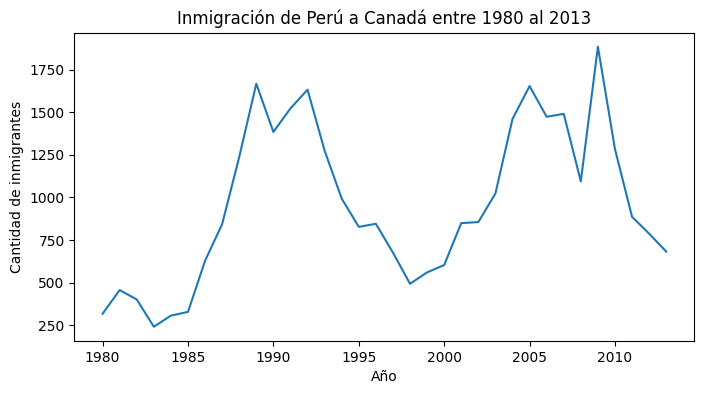

In [7]:
#Se importa la biblioteca
import matplotlib.pyplot as plt

#Se cambia las dimensiones de la figura. Las medidas están en pulgadas.
plt.figure(figsize=(8,4))

#Se grafica en un plano cartesiano los años como eje X, y los datos de inmigración en el eje Y.
plt.plot(df_inmigracionperu['Anos'], df_inmigracionperu['Peru'])

#Se limita la cantidad de etiquetas en el eje X.
anos_grafico1 = list(map(str, range(1980,2011,5)))
plt.xticks(anos_grafico1)

#Se añadió un título y etiquetas al gráfico.
plt.title('Inmigración de Perú a Canadá entre 1980 al 2013')
plt.xlabel('Año')
plt.ylabel('Cantidad de inmigrantes')

#Se muestra únicamente el gráfico.
plt.show()

###Desafío: comparando tendencias migratorias
Crear un gráfico de líneas comparando los números de inmigrantes de Brasil y Argentina a Canadá, los dos países más grandes de Sudamérica.

Por lo tanto, explora las diversas posibilidades y recuerda los elementos esenciales de un gráfico: título, etiquetas en los ejes x e y y las marcas del eje x, que deben definirse cada 5 años.

Además, tendrás que descubrir cómo agregar una leyenda para poder identificar la línea de cada país. Siguiendo estas instrucciones, habrás construido un gráfico sólido que te permitirá un análisis significativo y profundo.

In [8]:
#Se crea un dataframe con los datos de inmigración de Brasil y Argentina.
'''
Se transpuso el dataframe resultante, pues mantenía como filas los datos de
inmigración de Brasil y Argentina, y como columnas los años.
'''
df_inmigracion_brarg = df_inmigraciontotal.loc[['Brasil','Argentina'], anos].T

#Se muestra el df creado.
df_inmigracion_brarg.head()

Pais,Brasil,Argentina
1980,211,368
1981,220,426
1982,192,626
1983,139,241
1984,145,237


In [9]:
#Se quita el nombre del índice de columnas 'Pais'.
df_inmigracion_brarg.rename_axis(None, axis=1, inplace=True)
df_inmigracion_brarg.head()

,Brasil,Argentina
1980,211,368
1981,220,426
1982,192,626
1983,139,241
1984,145,237


In [10]:
#Se resetea el índice, y nombra al antiguo indice como la columna 'Anos'.
df_inmigracion_brarg.reset_index(inplace=True, names='Anos')
df_inmigracion_brarg.head()

,Anos,Brasil,Argentina
0,1980,211,368
1,1981,220,426
2,1982,192,626
3,1983,139,241
4,1984,145,237


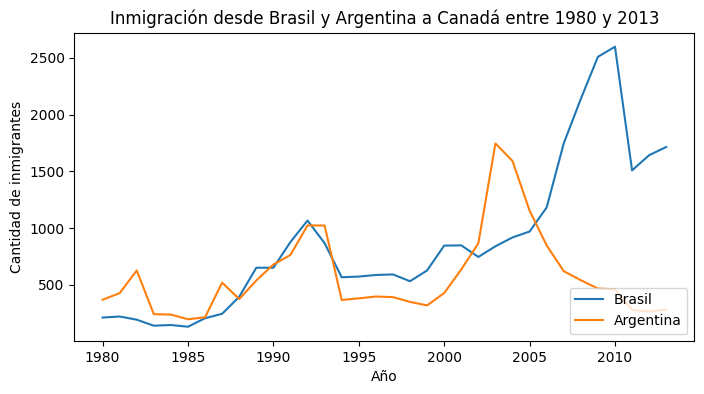

In [11]:
#Se establece el tamaño de la figura.
plt.figure(figsize=(8,4))

#Se grafican los datos en los ejes.
plt.plot(df_inmigracion_brarg['Anos'], df_inmigracion_brarg['Brasil'], label='Brasil')
plt.plot(df_inmigracion_brarg['Anos'], df_inmigracion_brarg['Argentina'], label='Argentina')

#Se añade una leyenda que toma de referencia el valor del parámetro label.
#Se solicita su ubicación en la esquina inferior derecha.
plt.legend(loc='lower right')

#Se restringe la cantidad de años que se mostrarán en el eje x.
plt.xticks(list(map(str,range(1980,2011,5))))

#Se añade un título y etiquetas a los ejes.
plt.title('Inmigración desde Brasil y Argentina a Canadá entre 1980 y 2013')
plt.xlabel('Año')
plt.ylabel('Cantidad de inmigrantes')

#Se muestra únicamente el gráfico.
plt.show()

Preguntas del desafío
1. ¿Hay alguna tendencia o patrón común en los datos de ambos países?

  Si existe una tendencia similar hasta principios del siglo XXI.
2. ¿Cuáles son los períodos con mayor número de inmigrantes en ambos países?

  Argentina alcanzó el mayor número de inmigrantes en el 2002 aprox., mientras que Brasil alcanzó el mayor número de inmigrante en 2009 aprox.



##Creando figuras con Maplotlib

###Creando una figura
Se creó una figura almacenando el **lienzo** (`fig`) y la **gráfica** (`ax`) en variables. Se usó la función `subplots` para crear múltiples gráficos y el parámetro `figsize` para definir el tamaño de la imagen. Se aplicó directamente el método `plot` a la variable `ax` para graficar los datos. Finalmente se ajustó los ticks del eje x con `xaxis.set_major_locator`.

In [12]:
#Verificamos los tipos de datos que tiene nuestro DF.
df_inmigracionperu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Anos    34 non-null     object
 1   Peru    34 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 676.0+ bytes


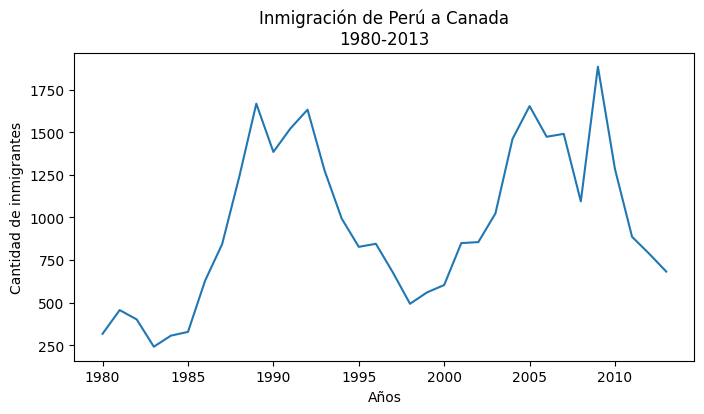

In [13]:
#Creamos un lienzo y un gráfico en variables.
fig, ax = plt.subplots(figsize=(8,4))

#Creamos el gráfico con los datos de inmigración de Perú a Canadá.
ax.plot(df_inmigracionperu['Anos'], df_inmigracionperu['Peru'])

#Reducimos la cantidad de etiquetas del eje X con el método xaxis.set_major_locator.
#El método funciona aunque 'Anos' contenga datos de tipo objeto.
ax.xaxis.set_major_locator(plt.MultipleLocator(5))

#Se asigna un título y etiquetas a los ejes.
ax.set_title('Inmigración de Perú a Canada\n1980-2013')
ax.set_xlabel('Años')
ax.set_ylabel('Cantidad de inmigrantes')

#Mostramos únicamente la figura creada.
plt.show()

###Creando subplots en una dirección
Se creó un gráfico de líneas para ver la tendencia de inmigración colombiana a Canadá y un box plot para estadísticas descriptivas.

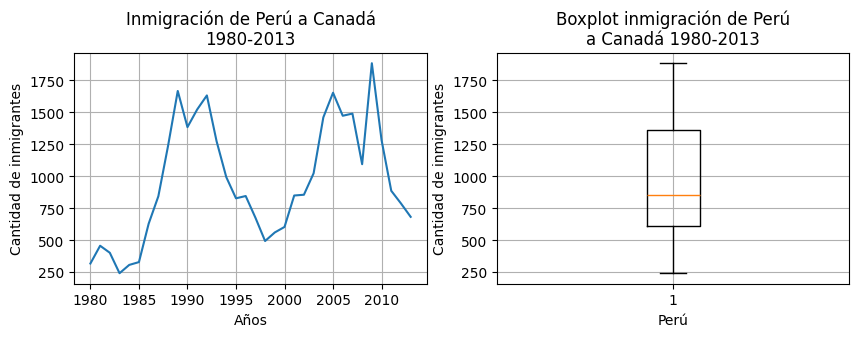

In [14]:
#Creamos la figura, de 1 fila y dos columnas, asignando el lienzo y gráficos a variables.
fig, axs = plt.subplots(1, 2, figsize=(10,3))

#Personalizamos el gráfico de líneas, en la posición 0 del lienzo.
axs[0].plot(df_inmigracionperu['Anos'], df_inmigracionperu['Peru'])
axs[0].xaxis.set_major_locator(plt.MultipleLocator(5))
axs[0].set_title('Inmigración de Perú a Canadá\n1980-2013')
axs[0].set_xlabel('Años')
axs[0].set_ylabel('Cantidad de inmigrantes')
axs[0].grid() #Añadimos una cuadrícula.

#Personalizamos el gráfico de cajas y bigotes, en la posición 1 del lienzo.
axs[1].boxplot(df_inmigracionperu['Peru'])
axs[1].set_title('Boxplot inmigración de Perú\na Canadá 1980-2013')
axs[1].set_xlabel('Perú')
axs[1].set_ylabel('Cantidad de inmigrantes')
axs[1].grid() #Añadimos una cuadrícula.

#Mostramos únicamente la figura creada.
plt.show()

###Creando subplots en dos direcciones
Se comparó datos de Perú, Brasil, Argentina y Colombia en un gráfico 2x2. Además, se ajustó el tamaño de la figura, asignó datos a cada subplot y mejoró los espacios entre gráficos.

Por otro lado, se usó un bucle para unificando escalas y añadir cuadrículas. También se usó otro bucle para formatear los ejes. Finalmente, agregamos un título general para mayor claridad.

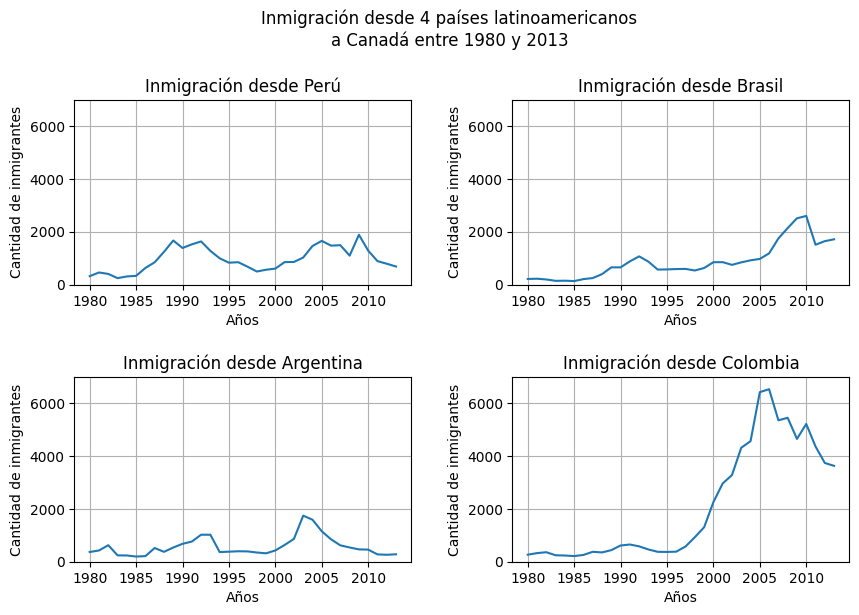

In [15]:
#Se crea la figura, de dos filas y dos columnas, asignando el lienzo y gráficas a variables.
fig, axs = plt.subplots(2, 2, figsize = (10,6))
fig.subplots_adjust(hspace=0.5, wspace=0.3)#Se ajustó los espacios entre cada gráfico.
#Se ubicó el texto en la cordena 1.03 en "Y" para separar el texto de los gráficos
fig.suptitle('Inmigración desde 4 países latinoamericanos\na Canadá entre 1980 y 2013', y=1.03)

#Se asignan datos a cada gráfica.
'''
Cada gráfica se genera con los datos de una serie. El índice de la serie son los
años, y los valores de la serie son los datos de inmigración.
'''
axs[0,0].plot(df_inmigraciontotal.loc['Perú', anos])
axs[0,0].set_title('Inmigración desde Perú')

axs[0,1].plot(df_inmigraciontotal.loc['Brasil', anos])
axs[0,1].set_title('Inmigración desde Brasil')

axs[1,0].plot(df_inmigraciontotal.loc['Argentina', anos])
axs[1,0].set_title('Inmigración desde Argentina')

axs[1,1].plot(df_inmigraciontotal.loc['Colombia', anos])
axs[1,1].set_title('Inmigración desde Colombia')

#Se iguala la escala del eje Y y aplican cuadrillas a los gráficos.
ymin = 0
ymax = 7000

for ax in axs.ravel():
  ax.set_ylim(ymin, ymax)
  ax.grid()

#Se nombra a los ejes y reduce la cantidad de etiquetas en el eje X.
for ax in axs.flat:
  ax.xaxis.set_major_locator(plt.MultipleLocator(5))
  ax.set_xlabel('Años')
  ax.set_ylabel('Cantidad de inmigrantes')

#Se muestra únicamente la figura.
plt.show()

###Desafío del aula 2
La gerencia de la empresa necesita visualizar claramente las tendencias de ventas en cada tienda, para que puedan tomar decisiones estratégicas sobre inventarios y acciones de marketing. Para ello, debes crear cuatro subgráficos dispuestos en dos filas y dos columnas, donde cada subgráfico represente una tienda diferente. En este desafío, cada subgráfico debe presentar un gráfico de líneas que muestre la variación del número de ventas a lo largo de los meses del año.

***Consejo:*** *Para facilitar la creación de los subgráficos, puedes definir la columna "tiendas" como índice del DataFrame y utilizar la propiedad loc de la biblioteca Pandas para trazar cada una de las tiendas.*

In [16]:
#Datos.
tiendas = ['A', 'B', 'C', 'D']
ventas_2022 = {'Jan': [100, 80, 150, 50],
    'Feb': [120, 90, 170, 60],
    'Mar': [150, 100, 200, 80],
    'Apr': [180, 110, 230, 90],
    'May': [220, 190, 350, 200],
    'Jun': [230, 150, 280, 120],
    'Jul': [250, 170, 300, 140],
    'Aug': [260, 180, 310, 150],
    'Sep': [240, 160, 290, 130],
    'Oct': [220, 140, 270, 110],
    'Nov': [400, 220, 350, 190],
    'Dec': [300, 350, 400, 250]}

#Se crea el Dataframe, siguiendo el consejo.
df_ventas = pd.DataFrame(ventas_2022, index=tiendas)
df_ventas.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
A,100,120,150,180,220,230,250,260,240,220,400,300
B,80,90,100,110,190,150,170,180,160,140,220,350
C,150,170,200,230,350,280,300,310,290,270,350,400
D,50,60,80,90,200,120,140,150,130,110,190,250


In [17]:
#Se importa la biblioteca calendar.
import calendar

#Se genera una lista con la abreviatura de los meses.
meses = list(calendar.month_abbr)[1:] #Se omite el elemento vacío en la posición 0.

#Se visuliza la lista creada.
meses

['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

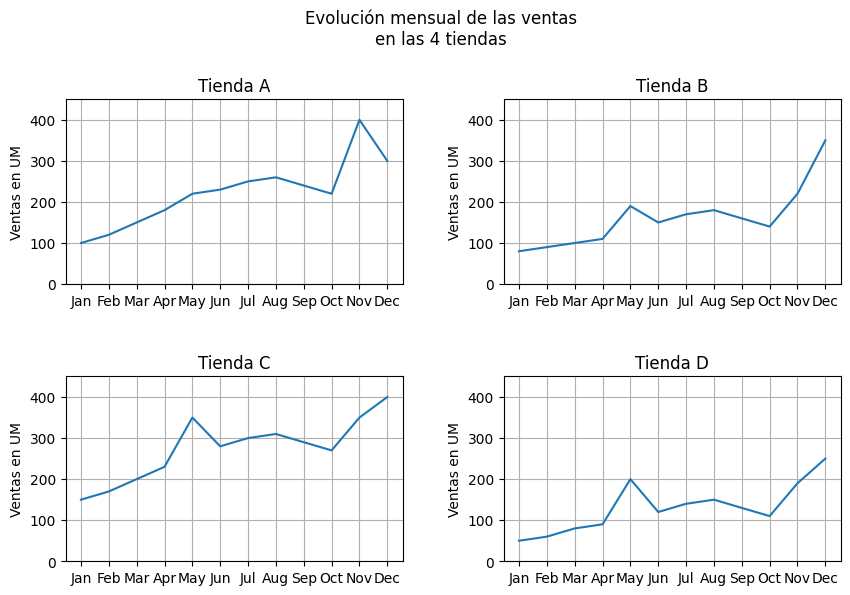

In [18]:
#Se crea una figura mutiejes asignando el lienzo y ejes a variables.
fig, axs = plt.subplots(2, 2, figsize=(10,6))
fig.suptitle('Evolución mensual de las ventas\nen las 4 tiendas', y=1.03) #Se agrega un título general y su ubicación en el eje vertical.
fig.subplots_adjust(hspace=0.5, wspace=0.3) #Se ajusta el espacio entre ejes

#Se asignan los datos a cada eje.
axs[0,0].plot(df_ventas.loc['A', meses])
axs[0,0].set_title('Tienda A')

axs[0,1].plot(df_ventas.loc['B', meses])
axs[0,1].set_title('Tienda B')

axs[1,0].plot(df_ventas.loc['C', meses])
axs[1,0].set_title('Tienda C')

axs[1,1].plot(df_ventas.loc['D', meses])
axs[1,1].set_title('Tienda D')

#Se iteran sobre los ejes.
ymax = 450
ymin = 0
for ax in axs.flat:
  ax.set_ylim(ymin, ymax) #Uniformizamos la escala del eje Y.
  ax.set_ylabel('Ventas en UM') #Agregamos un título al eje Y.
  ax.grid() #Se agrega cuadrilla.

#Se muestra únicamente la imagen.
plt.show()

##Personalizando gráficos con Maplotlib

###Personalizando visualizaciones con matplotlib
Se ajustó el tamaño de la fuente para el título y los rótulos, así como para los números en los ejes. También se cambió la ubicación del título a la izquierda, modificó el grosor de la línea y añadió marcadores.

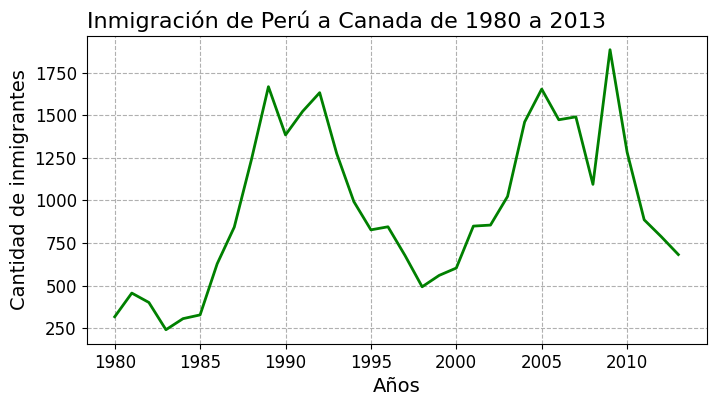

In [19]:
#Creamos un lienzo y un gráfico en variables.
fig, ax = plt.subplots(figsize=(8,4))

#Creamos el gráfico con los datos de inmigración de Perú a Canadá.
ax.plot(df_inmigracionperu['Anos'], df_inmigracionperu['Peru'], lw=2, c='g') #marker='o')

#Reducimos la cantidad de etiquetas del eje X con el método xaxis.set_major_locator.
#El método funciona aunque 'Anos' contenga datos de tipo objeto.
ax.xaxis.set_major_locator(plt.MultipleLocator(5))

#Se asigna un título y etiquetas a los ejes.
#Se altera el tamaño del texo, y en el título se altera también el grosor y color de la línea.
ax.set_title('Inmigración de Perú a Canada de 1980 a 2013', fontsize= 16, loc='left')
ax.set_xlabel('Años', fontsize=14)
ax.set_ylabel('Cantidad de inmigrantes', fontsize=14)

#Se cambia el tamaño de las etiquetas de los valores en los ejes.
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

#Se añade la cuadrícula, con un estilo de líneas punteadas.
ax.grid(linestyle='--')

#Mostramos únicamente la figura creada.
plt.show()

###Para saber más: Alterando los estilos
En Matplotlib, se pueden usar estilos predefinidos para personalizar las visualizaciones. Se pueden conocer ejecutando `print(plt.style.available)`. Para aplicarlos a nivel global se debe usar la función `plt.style.use()` y se puede restaurar el estilos predeterminado con `plt.rcParams.update(IPython_default)`. Cabe precisar que se debe guardar una copia de la configuración predeterminada con `IPython_default = plt.rcParams.copy()`.

Se puede usar el administrador de contexto `plt.style.context()` junto a la clausula `with` para aplicar estilos solo a bloques de código específicos

In [20]:
#Conocemos los estilos disponibles.
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


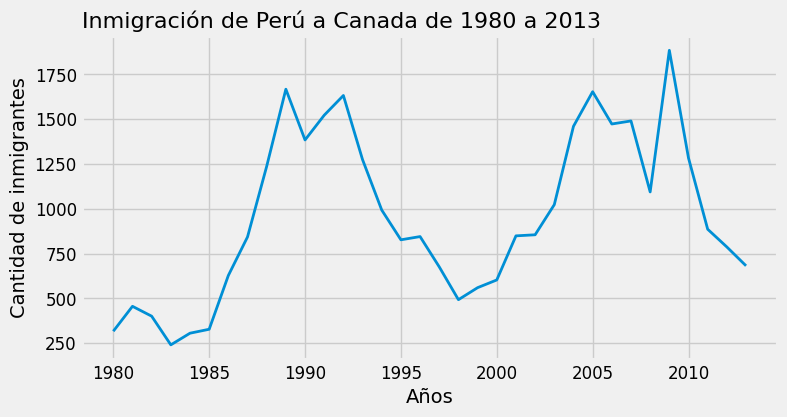

In [21]:
#Se aplica el estilo 'fivethirtyeight' al gráfico de inmigración de Perú a Canadá.
with plt.style.context('fivethirtyeight'):
  fig, ax = plt.subplots(figsize=(8,4))
  ax.plot(df_inmigracionperu['Anos'], df_inmigracionperu['Peru'], lw=2)
  ax.xaxis.set_major_locator(plt.MultipleLocator(5))
  ax.set_title('Inmigración de Perú a Canada de 1980 a 2013', fontsize= 16, loc='left')
  ax.set_xlabel('Años', fontsize=14)
  ax.set_ylabel('Cantidad de inmigrantes', fontsize=14)
  ax.xaxis.set_tick_params(labelsize=12)
  ax.yaxis.set_tick_params(labelsize=12)
  plt.show()

###Alterando colores
Se usó un DataFrame que contiene únicamente los datos de los países **Sudamérica**, graficando con `ax.bar` y colores personalizados. Ajustamos títulos con `ax.set_title`, etiquetas con `ax.set_ylabel` y `ax.xaxis.set_tick_params`.

In [22]:
#Generación del dataframe Sudamerica.
df_inmigracionsudamerica = df_inmigraciontotal.query('Region == "América del Sur"')
df_inmigracionsudamerica

,Continente,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Pais,,,,,,,,,,,,,,,,,,,,,
Argentina,América Latina y el Caribe,América del Sur,368,426,626,241,237,196,213,519,...,1153,847,620,540,467,459,278,263,282,19596
Bolivia,América Latina y el Caribe,América del Sur,44,52,42,49,38,44,79,165,...,134,139,107,143,214,180,86,83,107,3205
Brasil,América Latina y el Caribe,América del Sur,211,220,192,139,145,130,205,244,...,969,1181,1746,2138,2509,2598,1508,1642,1714,29659
Chile,América Latina y el Caribe,América del Sur,1233,1069,1078,781,681,533,633,1454,...,384,427,530,350,375,340,174,291,273,21359
Colombia,América Latina y el Caribe,América del Sur,266,326,360,244,235,214,257,376,...,6424,6535,5357,5452,4652,5218,4366,3741,3631,72088
Ecuador,América Latina y el Caribe,América del Sur,238,207,184,155,179,208,240,344,...,491,525,419,437,373,353,348,282,418,12233
Guyana,América Latina y el Caribe,América del Sur,2334,2943,3575,2650,1932,2299,3942,6174,...,1215,1286,1277,1137,1180,953,804,676,656,75785
Paraguay,América Latina y el Caribe,América del Sur,45,26,32,40,48,36,34,72,...,75,88,98,95,88,89,83,55,66,1944
Perú,América Latina y el Caribe,América del Sur,317,456,401,241,306,328,628,843,...,1653,1473,1490,1094,1884,1283,886,787,682,32652


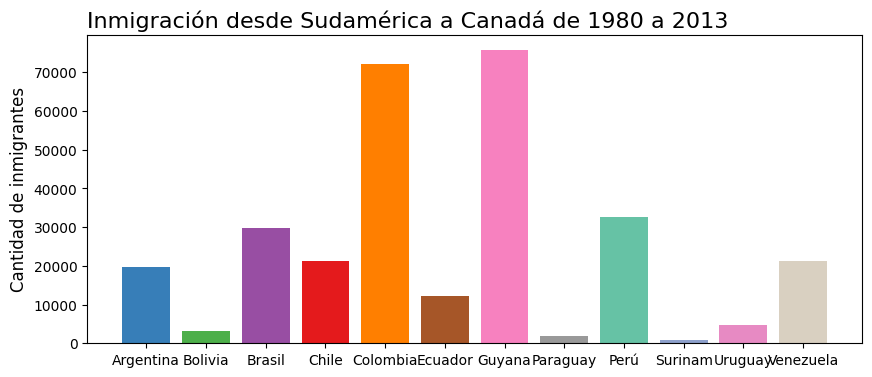

In [23]:
#Se crea la lista con los colores de las barras.
colores = ['#377eb8', '#4daf4a', '#984ea3', '#e41a1c', '#ff7f00', '#a65628',
           '#f781bf', '#999999', '#66c2a5', '#8da0cb', '#e78ac3', '#d9d0c1']

#Se crea el lienzo y un eje, asignando ambos a variables.
fig, ax = plt.subplots(figsize=(10,4))

#Se añaden los datos al eje.
ax.bar(x=df_inmigracionsudamerica.index, height=df_inmigracionsudamerica['Total'], color=colores)

#Se da formato al título, etiquetas de los ejes y de los marcadores.
ax.set_title('Inmigración desde Sudamérica a Canadá de 1980 a 2013', fontsize=16, loc='left')
ax.set_xlabel('') #Se consigna como vacío para eliminar espacios entre los marcadores y el final de la figura.
ax.set_ylabel('Cantidad de inmigrantes', fontsize=12)
ax.xaxis.set_tick_params(labelsize=10)
ax.yaxis.set_tick_params(labelsize=10)

#Se muestra únicamente la imagen creada.
plt.show()

###Alterando colores parte 2
Se optimizó la visualización de datos de inmigración sudamericana en Canadá. Se usaron barras horizontales y `sort_values` para ordenar los datos. Se resaltó Colombia con un color diferente mediante un bucle `for`. Además, se ajustó el título y las etiquetas para mejorar la claridad del gráfico.

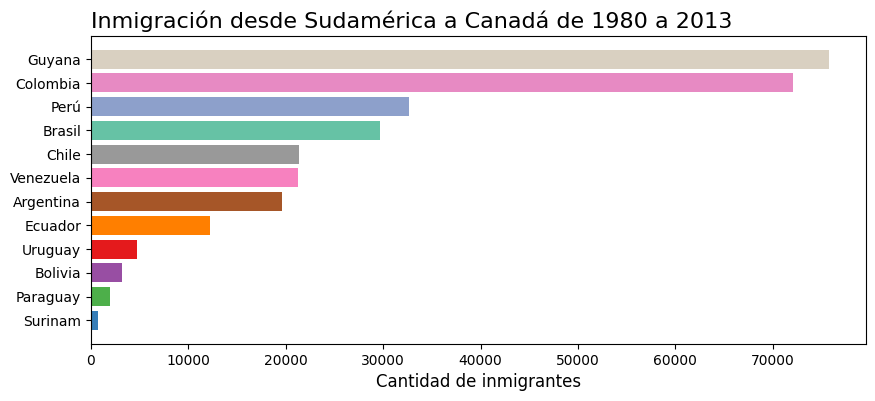

In [24]:
#Se ordenó el dataframe de Sudamerica por los valores de la columna 'Total' en orden ascendente.
df_inmigracionsudamerica = df_inmigracionsudamerica.sort_values(by='Total', ascending=True)

#Se realizó el gráfico de barras horizontales.
fig, ax = plt.subplots(figsize=(10,4))

#Se añaden los datos al eje.
ax.barh(y=df_inmigracionsudamerica.index, width=df_inmigracionsudamerica['Total'], color=colores)

#Se da formato al título, etiquetas de los ejes y de los marcadores.
ax.set_title('Inmigración desde Sudamérica a Canadá de 1980 a 2013', fontsize=16, loc='left')
ax.set_xlabel('Cantidad de inmigrantes', fontsize=12)
ax.set_ylabel('') #Se consigna como vacío para eliminar espacios entre los marcadores y la figura.
ax.xaxis.set_tick_params(labelsize=10)
ax.yaxis.set_tick_params(labelsize=10)

#Se muestra únicamente la imagen creada.
plt.show()

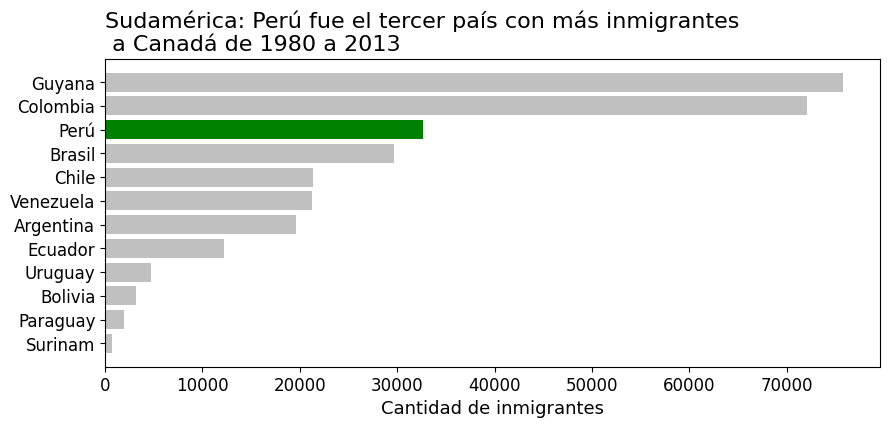

In [25]:
#Se creó una nueva lista de colores para resaltar los datos de Perú.
colores_2 = []
for pais in df_inmigracionsudamerica.index:
  if pais == 'Perú':
    colores_2.append('green')
  else:
    colores_2.append('silver')

#Se creó un nuevo gráfico.
fig, ax = plt.subplots(figsize=(10,4))

ax.barh(y=df_inmigracionsudamerica.index, width=df_inmigracionsudamerica['Total'], color=colores_2)

ax.set_title('Sudamérica: Perú fue el tercer país con más inmigrantes\n a Canadá de 1980 a 2013', fontsize=16, loc='left')
ax.set_xlabel('Cantidad de inmigrantes', fontsize=13)
ax.set_ylabel('')
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

plt.show()

###Añadiendo anotaciones
Se mejoraron los gráficos de Matplotlib con `ax.text` para anotaciones, mostrando valores exactos. Se simplificó el gráfico con `ax.set_frame_on(False)` y `ax.xaxis.set_visible(False)`. Se ajustó la apariencia del eje Y con `ax.tick_params`.

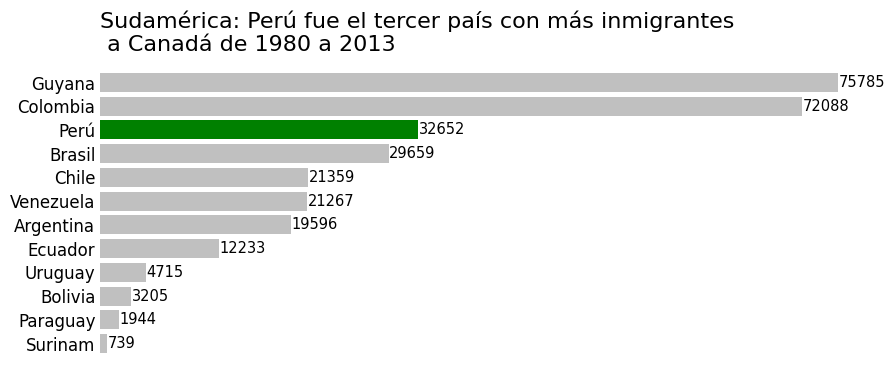

In [28]:
#Se comentó solo los cambios respecto al gráfico anterior.
colores_2 = []
for pais in df_inmigracionsudamerica.index:
  if pais == 'Perú':
    colores_2.append('green')
  else:
    colores_2.append('silver')


fig, ax = plt.subplots(figsize=(10,4))

ax.barh(y=df_inmigracionsudamerica.index, width=df_inmigracionsudamerica['Total'], color=colores_2)
ax.set_frame_on(False) #Se quita el recuadro del gráfico, para dar espacio al texto.
ax.xaxis.set_visible(False) #Se quita todo el eje X.

ax.set_title('Sudamérica: Perú fue el tercer país con más inmigrantes\n a Canadá de 1980 a 2013', fontsize=16, loc='left')
ax.yaxis.set_tick_params(labelsize=12)
ax.set_ylabel('')
ax.tick_params(axis='y', which='both', size=0) #Se quitan los marcadores del eje Y, al establecer su tamaño a cero.

'''
#Se comentó el código relacionado con la apariencia del eje X porque se eliminó del gráfico.
ax.xaxis.set_tick_params(labelsize=12)
ax.set_xlabel('Cantidad de inmigrantes', fontsize=13)
'''

#Mediante un ciclo for se ubican las etiquetas con los datos de inmigración en las barras.
for indice, valor in enumerate(df_inmigracionsudamerica['Total']):
  ax.text(x=valor+20, y=indice, s=str(valor), size=10.5, ha='left', va='center')

plt.show()

###Exportando imágenes
Se exportó dos gráficos de Matplotlib usando `fig.savefig` en formatos como *PNG*.Los parámetros clave son `transparent` (para el fondo), `dpi` (resolución) y `bbox_inches` (ajuste de márgenes).

In [29]:
#Los formatos en que se puede exportar una imagen desde Maplotlib son los siguientes.
print(fig.canvas.get_supported_filetypes())

{'eps': 'Encapsulated Postscript', 'jpg': 'Joint Photographic Experts Group', 'jpeg': 'Joint Photographic Experts Group', 'pdf': 'Portable Document Format', 'pgf': 'PGF code for LaTeX', 'png': 'Portable Network Graphics', 'ps': 'Postscript', 'raw': 'Raw RGBA bitmap', 'rgba': 'Raw RGBA bitmap', 'svg': 'Scalable Vector Graphics', 'svgz': 'Scalable Vector Graphics', 'tif': 'Tagged Image File Format', 'tiff': 'Tagged Image File Format', 'webp': 'WebP Image Format'}


In [30]:
#Se monta Google Drive en Colab para exportar las imágenes a Drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


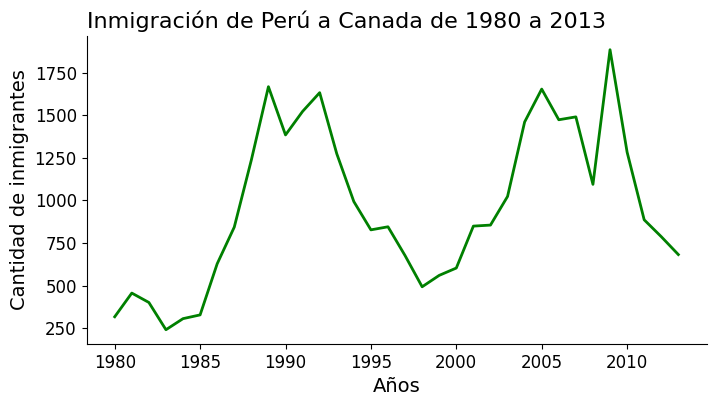

In [35]:
#Se exporta el primer gráfico a PNG.
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(df_inmigracionperu['Anos'], df_inmigracionperu['Peru'], lw=2, c='g')
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
ax.set_title('Inmigración de Perú a Canada de 1980 a 2013', fontsize= 16, loc='left')
ax.set_xlabel('Años', fontsize=14)
ax.set_ylabel('Cantidad de inmigrantes', fontsize=14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

#Se quita la línea superior y derecha del gráfico.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#Se exporta la imagen a Google Drive.
path_fig1 = '/content/drive/MyDrive/Aprendizaje-vigente/Programa ONE/Ruta 5 - Aprendiendo a hacer ETL/5-visualizacion-de-datos-con-python/inmigracion_peru_canada.png'
fig.savefig(path_fig1, transparent=False, dpi=300, bbox_inches='tight')

plt.show()

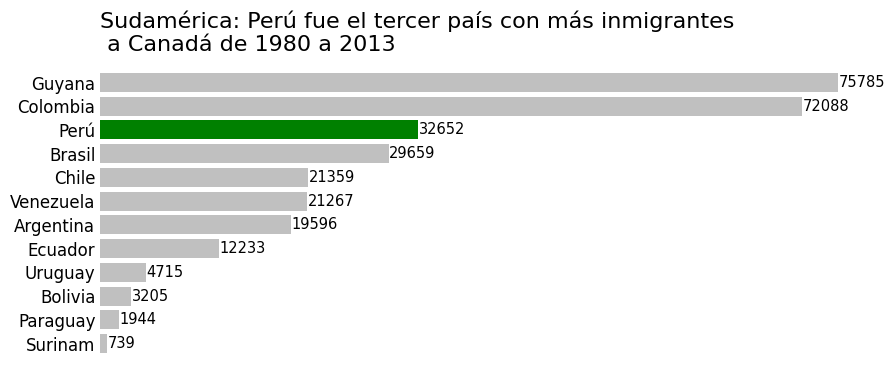

In [36]:
#Se exporta el segundo gráfico a PNG.
colores_2 = []
for pais in df_inmigracionsudamerica.index:
  if pais == 'Perú':
    colores_2.append('green')
  else:
    colores_2.append('silver')

fig, ax = plt.subplots(figsize=(10,4))
ax.barh(y=df_inmigracionsudamerica.index, width=df_inmigracionsudamerica['Total'], color=colores_2)
ax.set_frame_on(False)
ax.xaxis.set_visible(False)
ax.set_title('Sudamérica: Perú fue el tercer país con más inmigrantes\n a Canadá de 1980 a 2013', fontsize=16, loc='left')
ax.yaxis.set_tick_params(labelsize=12)
ax.set_ylabel('')
ax.tick_params(axis='y', which='both', size=0)

for indice, valor in enumerate(df_inmigracionsudamerica['Total']):
  ax.text(x=valor+20, y=indice, s=str(valor), size=10.5, ha='left', va='center')

#Se exporta la imagen.
path_fig2 = '/content/drive/MyDrive/Aprendizaje-vigente/Programa ONE/Ruta 5 - Aprendiendo a hacer ETL/5-visualizacion-de-datos-con-python/inmigracion_sudamerica_canada.png'
fig.savefig(path_fig2, transparent=True, dpi=300, bbox_inches='tight')

plt.show()

###Desafío del aula 3
En esta segunda parte del desafío, debes explorar las opciones de personalización de los subgráficos para hacer que la figura sea más clara y atractiva para la gerencia de la empresa.
Algunas ideas de personalización que puedes explorar son:

* Cambiar la posición de los títulos de los subgráficos a la izquierda.
* Aumentar el tamaño de la fuente del título general de la figura para resaltarlo.
* Aumentar el tamaño de los títulos y etiquetas de los ejes de los subgráficos.
* Hacer que las líneas sean más gruesas.
* Cambiar el color de las líneas de cada tienda para diferenciarlas aún más.

***Consejo:*** *Puedes reducir el tamaño del código utilizando el comando for `i`, `ax` in `enumerate(axs.flat)`:, que permite un bucle que itera sobre todos los subgráficos de la figura. Dentro de este bucle, puedes pasar las funciones `plot`, `set_title`, `set_xlabel`, `set_ylabel`, y así sucesivamente...*

In [37]:
#Dataframe de ventas
df_ventas

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
A,100,120,150,180,220,230,250,260,240,220,400,300
B,80,90,100,110,190,150,170,180,160,140,220,350
C,150,170,200,230,350,280,300,310,290,270,350,400
D,50,60,80,90,200,120,140,150,130,110,190,250


In [41]:
#Lista con el nombre de las tiendas
tiendas = list(df_ventas.index)
tiendas

['A', 'B', 'C', 'D']

In [38]:
#Serie con la abreviatura de los meses del año.
meses

['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

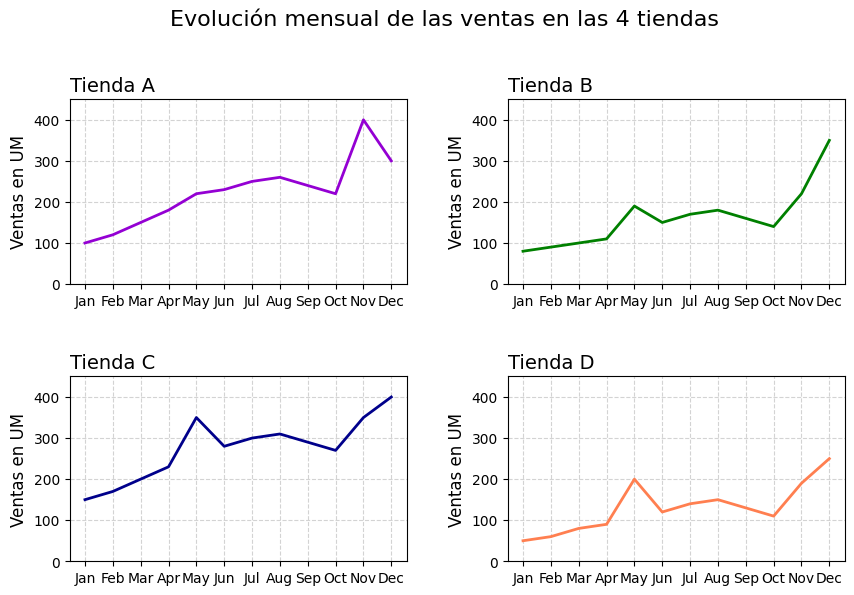

In [46]:
#Se personaliza la visualización.
fig, axs = plt.subplots(2, 2, figsize=(10,6))
fig.suptitle('Evolución mensual de las ventas en las 4 tiendas', fontsize=16, y=1.03) #Se estableción 16 como el tamaño del texto.
fig.subplots_adjust(hspace=0.5, wspace=0.3)

#Se crea un mapa de colores.
colores_ventas = ['darkviolet', 'green', 'darkblue', 'coral']

#Se establece los valores límites del eje Y.
ymax = 450
ymin = 0

#Se itera sobre los ejes de la figura.
for i, ax in enumerate(axs.flat):
  #Datos
  ax.plot(df_ventas.loc[tiendas[i], meses], lw=2, c=colores_ventas[i])

  #Título
  ax.set_title(f'Tienda {tiendas[i]}', loc='left', fontsize=14)

  #Etiqueta de los ejes.
  ax.tick_params(labelsize=10)

  #Eje Y
  ax.set_ylim(ymin, ymax)
  ax.set_ylabel('Ventas en UM', fontsize=12)

  #Cuadricula
  ax.grid(color='lightgrey', linestyle='--') #Se agrega cuadrilla, con líneas punteadas.

#Se exporta la imagen a Drive.
path_fig3 = '/content/drive/MyDrive/Aprendizaje-vigente/Programa ONE/Ruta 5 - Aprendiendo a hacer ETL/5-visualizacion-de-datos-con-python/desafio_ventas.png'
fig.savefig(path_fig3, transparent=False, dpi=300, bbox_inches='tight')

#Se muestra únicamente la imagen.
plt.show()

##Conociendo la biblioteca Seaborn
Biblioteca basada en Mpalotlib que cuenta con gráficos más artisticos. [Documentación oficial](https://seaborn.pydata.org/).

In [50]:
#Se importa Seaborn.
import seaborn as sns

###Creando el primer gráfico con Seaborn
Se exploró **Seaborn**, importándolo como sns y estableciendo un tema con `sns.set_theme()`. Se creó un DataFrame top10 con `sort_values(ascending=False)` y `head(10)`. Más adelante se usó `sns.barplot` para un gráfico de barras horizontal con **y=top10.index** y **orient='h'**, y se finalizó con `plt.show()`.

In [51]:
#Establecemos un tema artístico para los gráficos que se generarán.
sns.set_theme()

In [52]:
#Se crea el dataframe con los 10 países que más inmigrantes tuvieron a Canadá.
#A diferencia de Maplotlib, se creo un DF con los valores totales en orden descendente.
df_inmigraciontop10 = df_inmigraciontotal.sort_values(by= 'Total',ascending = False).head(10)
df_inmigraciontop10

,Continente,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Pais,,,,,,,,,,,,,,,,,,,,,
India,Asia,Sur de Asia,8880,8670,8147,7338,5704,4211,7150,10189,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Asia Oriental,5123,6682,3308,1863,1527,1816,1960,2643,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
Reino Unido,Europa,Norte de Europa,22045,24796,20620,10015,10170,9564,9470,21337,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Filipinas,Asia,Sudeste Asiático,6051,5921,5249,4562,3801,3150,4166,7360,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistán,Asia,Sur de Asia,978,972,1201,900,668,514,691,1072,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
Estados Unidos,América del Norte,América del Norte,9378,10030,9074,7100,6661,6543,7074,7705,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
Irán,Asia,Sur de Asia,1172,1429,1822,1592,1977,1648,1794,2989,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Sri Lanka,Asia,Sur de Asia,185,371,290,197,1086,845,1838,4447,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358
Corea del Sur,Asia,Asia Oriental,1011,1456,1572,1081,847,962,1208,2338,...,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581


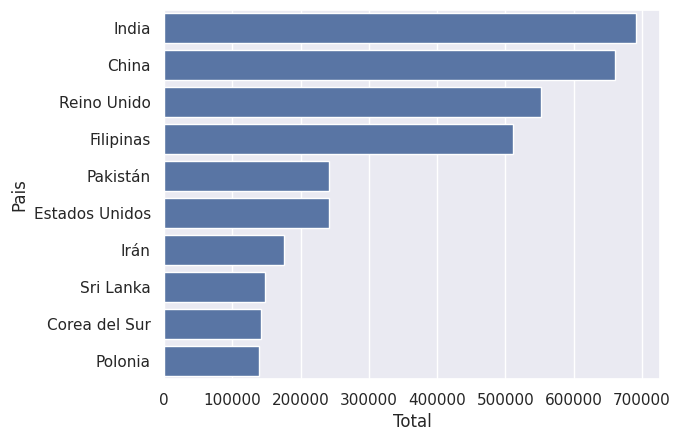

In [53]:
#Se crea la visualización de barras horizontales de los 10 países con más inmigrantes.
sns.barplot(data=df_inmigraciontop10, x='Total',y=df_inmigraciontop10.index, orient='h')

#Se muestra únicamente el gráfico.
plt.show()